In [1]:
import numpy as np
import pandas as pd

- Dataset used from https://www.kaggle.com/datasets/fedesoriano/cern-electron-collision-data

In [2]:
df = pd.read_csv("dielectron.csv")
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


# Dataset Details:
- E1,E2: Total energy of electron in Gigavolts (GeV) for electrons E1 and E2.

- px,py,pz: The X,Y,Z components of momentum for electrons E1 and E2.

- pt1,pt2: Transverse Momentum. It is a measure of the momentum of a particle perpendicular to the beam direction in a particle accelerator or collider.

- eta1,eta2: Pseudorapidity. It  is a measure of the angle of a particle with respect to the beam direction in a particle accelerator or collider.

- phi1,phi2: Phi Angle in radians.

- Q1,Q2: Invariant mass of 2 electrons.

- M: Mass of the electrons ( in **GeV** ). 

In [3]:
df.shape

(100000, 19)

In [4]:
df.drop(['Run','Event'], axis=1, inplace=True)

In [5]:
df.head()

,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [8]:
df.columns = df.columns.str.lower()

In [9]:
df.head()

,e1,px1,py1,pz1,pt1,eta1,phi1,q1,e2,px2,py2,pz2,pt2,eta2,phi2,q2,m
0,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [14]:
df.describe()

,e1,px1,py1,pz1,pt1,eta1,phi1,q1,e2,px2,py2,pz2,pt2,eta2,phi2,q2,m
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99915.000000
mean,36.436466,0.135897,0.182291,-1.508037,14.412167,-0.064095,0.021614,-0.00548,44.002901,-0.003984,0.124654,-1.590559,13.802036,-0.072830,0.021385,-0.004220,30.019521
std,41.216203,13.404976,13.470281,51.603652,12.388740,1.462137,1.799562,0.99999,46.751132,13.127404,13.168867,61.430040,12.460549,1.738033,1.817031,0.999996,25.255847
min,0.377928,-250.587000,-126.079000,-840.987000,0.219629,-4.165380,-3.141580,-1.00000,0.472500,-233.730000,-145.651000,-655.396000,0.026651,-7.064790,-3.141580,-1.000000,2.000080
25%,8.458595,-5.233675,-5.276248,-15.859825,3.771172,-1.283883,-1.527030,-1.00000,11.055725,-4.794770,-4.605965,-22.036950,3.738103,-1.892287,-1.556925,-1.000000,12.445200
50%,21.717000,0.141339,0.099092,-0.312987,12.967800,-0.061178,0.034324,-1.00000,25.264600,-0.035638,0.083665,-0.690244,11.690950,-0.135911,0.026986,-1.000000,21.283100
75%,50.003350,5.714560,5.648087,13.212650,20.018925,1.144408,1.562355,1.00000,66.925525,4.819540,5.061860,19.005825,19.596400,1.768253,1.596737,1.000000,39.025050
max,850.602000,134.539000,147.467000,760.096000,265.578000,2.622970,3.141420,1.00000,948.375000,227.330000,166.283000,935.558000,281.654000,3.060550,3.141290,1.000000,109.999000


<AxesSubplot: >

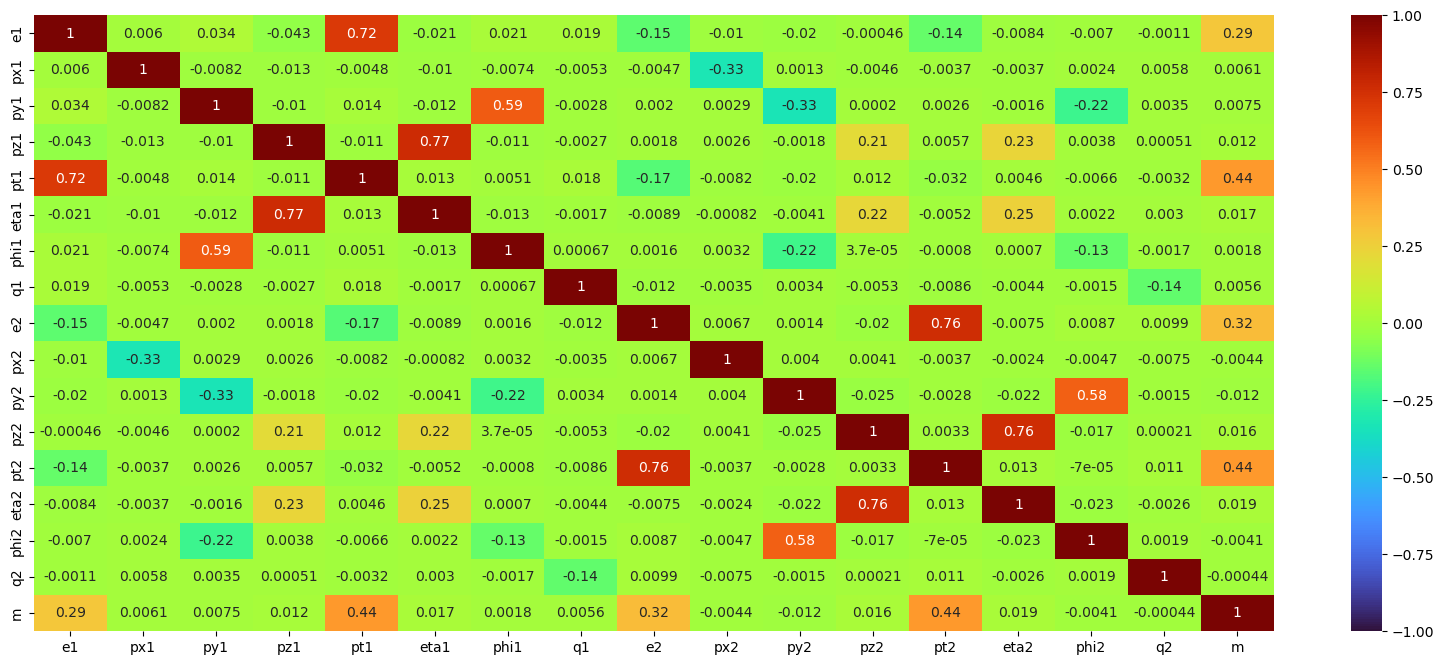

In [43]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0, cmap='turbo')

# Studying every feature's distribution

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [12]:
df.columns

Index(['e1', 'px1 ', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'q1', 'e2', 'px2',
       'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'q2', 'm'],
      dtype='object')

<AxesSubplot: xlabel='e1', ylabel='Count'>

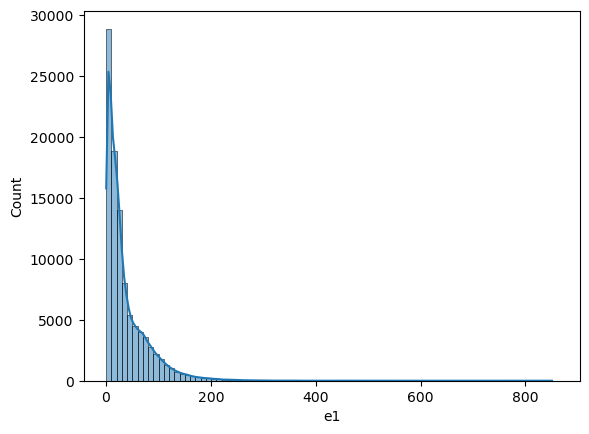

In [19]:
sns.histplot(df['e1'], binwidth=10, kde=True)

<AxesSubplot: xlabel='px1', ylabel='Count'>

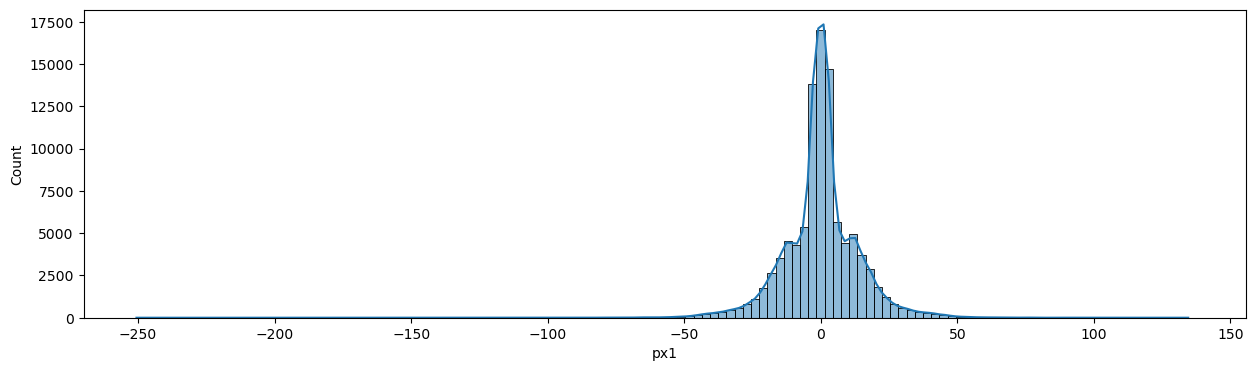

In [50]:
plt.figure(figsize=(15,4))
sns.histplot(df['px1'],binwidth=3,kde=True)

<AxesSubplot: xlabel='py1', ylabel='Count'>

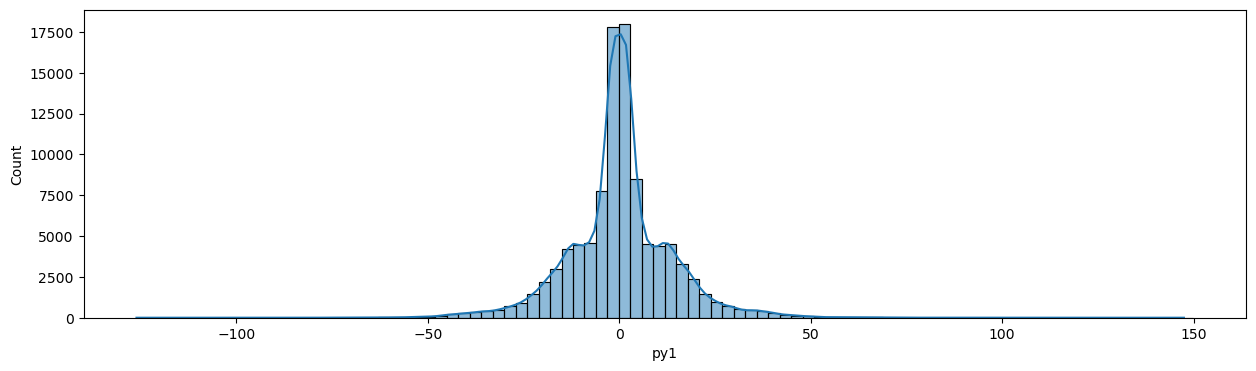

In [49]:
plt.figure(figsize=(15,4))
sns.histplot(df['py1'],binwidth=3,kde=True)

<AxesSubplot: xlabel='px1', ylabel='Count'>

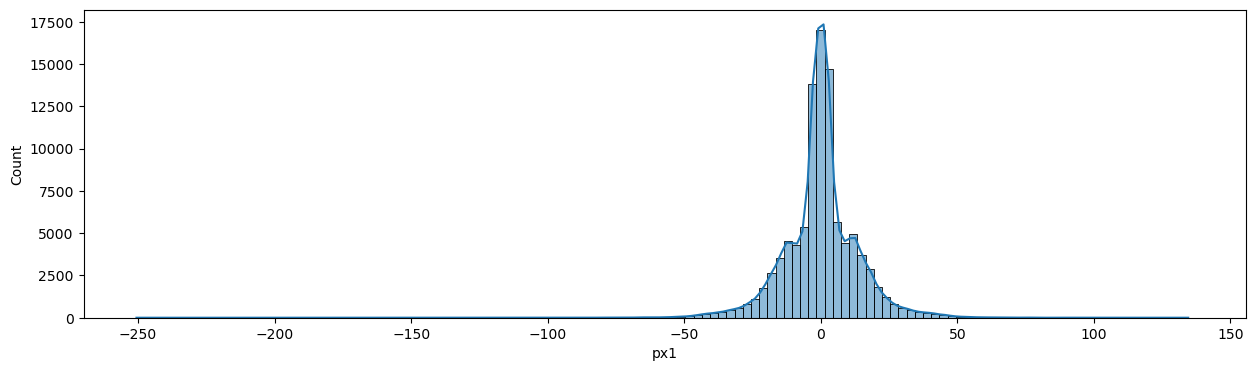

In [51]:
plt.figure(figsize=(15,4))
sns.histplot(df['px1'],binwidth=3,kde=True)

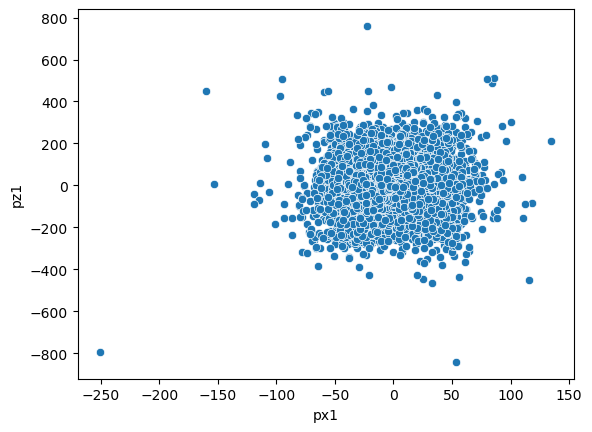

In [57]:
sns.scatterplot(df,x='px1', y='pz1');

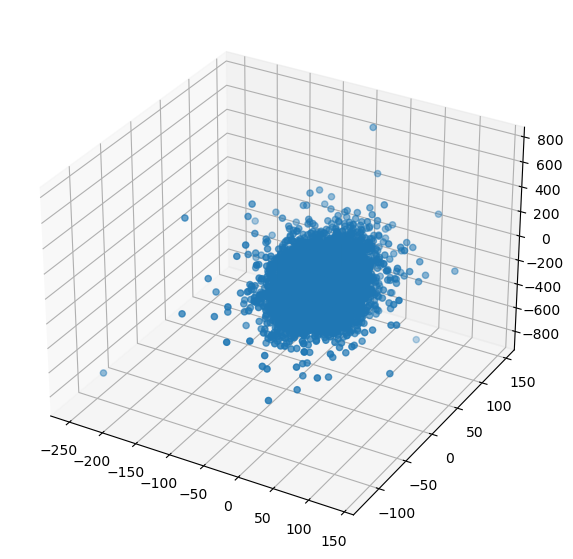

In [71]:
fig = plt.figure(figsize=(15,7))
ax =fig.add_subplot(projection='3d')
ax.scatter(df['px1'],df['py1'], df['pz1'])

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [88]:
df.dropna(inplace=True)

In [89]:
X = df.drop('m', axis=1).values
y = df['m'].values

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [101]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
xgb = GradientBoostingRegressor()

params={
    'learning_rate': [0.1,0.001,0.03],
    'n_estimators': [10,50,100,200],
    'min_samples_split': [2,4,6,8]
}

grid = GridSearchCV(xgb,param_grid=params,n_jobs=3)

grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [92]:
pred = reg_pipe.predict(X_test)

In [95]:
mean_absolute_error(y_test,pred)

8.553990011225105

In [96]:
mean_squared_error(y_test,pred)

152.5458687262352